<h1><center>Multi-Class Classificatoin</center></h1>

* Multiclass classifiers can distinguish between more than two classes.
* By default some algorithms such as "Random Forest Classifier", "Naive Bayes Classifier" can handle multiclass classication.
* Some algorithms such as "Support Vector Machine(SVM)", "Linear Classifiers" cannot hanlde multiclass. There are some methods such as **One-Versus-All, One-Versus-One** to handle multiclass classification using these algorithms.
* When we use multiclass incapable algorithms, **scikit-Learn detects and most of the times it applies One-Vs-All automatically**. For SVM it applies One-Vs-One as it scales poorly with size of the train set. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

import random
random.seed(10)

In [2]:
digit_dataset = pd.read_csv('../Data/digit_recognizer_train.csv')

In [3]:
digit_dataset.shape

(42000, 785)

In [4]:
digit_dataset.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
digit_X = digit_dataset.iloc[:, 1:]
digit_y = digit_dataset['label']

In [6]:
# By default train_test_split does STRATIFIED split based on label (y-value).
from sklearn.model_selection import train_test_split
digit_X_train, digit_X_test, digit_y_train, digit_y_test = train_test_split(digit_X, digit_y, test_size=0.2)

In [7]:
stdScaler = StandardScaler()

In [8]:
digit_X_train = stdScaler.fit_transform(digit_X_train)

In [9]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42, loss='log')
sgd_clf.fit(digit_X_train, digit_y_train)

SGDClassifier(loss='log', random_state=42)

### Make prediction

In [14]:
np_some_digit = digit_X_train[6735].reshape((1, -1))

In [15]:
sgd_clf.predict(np_some_digit)

array([3], dtype=int64)

### Looking at Probabilities of each class

In [16]:
sgd_clf.predict_proba(np_some_digit)

array([[8.26747742e-212, 0.00000000e+000, 4.71929497e-268,
        9.99993099e-001, 0.00000000e+000, 6.90128503e-006,
        0.00000000e+000, 0.00000000e+000, 8.41606197e-113,
        0.00000000e+000]])

### Looking at Decisoin Scores of each class

In [17]:
sgd_clf.decision_function(np_some_digit)

array([[ -486.03570338, -1342.8545652 ,  -615.5411386 ,   343.33168951,
        -2645.16561198,   -11.88378912, -1086.27794636, -2382.48408937,
         -258.06196659, -2873.99076126]])

In [18]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [14]:
# np.argmax returns the index of the maximum value
np.argmax(sgd_clf.decision_function(np_some_digit))

3

## Error Analysis

In [15]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score,f1_score

In [16]:
y_train_pred = sgd_clf.predict(digit_X_train)

In [17]:
conf_mx = confusion_matrix(digit_y_train, y_train_pred)
conf_mx

array([[3154,    0,    5,    5,    5,   27,   28,    2,   58,    0],
       [   0, 3606,   14,   12,    2,   23,    5,    6,   66,    6],
       [  12,   13, 3011,   43,   33,   14,   29,   24,  123,    5],
       [  13,   14,   61, 3055,    2,  109,   20,   20,  115,   44],
       [   5,    9,   21,    5, 3049,    6,   15,   12,   75,   91],
       [  21,   12,   13,   83,   35, 2632,   38,   12,  134,   40],
       [  16,    6,   15,    0,   14,   48, 3207,    2,   39,    0],
       [  10,   12,   42,   13,   13,    5,    2, 3302,   29,  123],
       [  10,   30,   19,   52,    4,   59,   12,    5, 3042,   38],
       [  14,   13,   10,   38,   74,   15,    1,   81,  103, 2990]],
      dtype=int64)

<img src="confusion_matrix_multiclass.png" />

In [18]:
precision_score(digit_y_train, y_train_pred, average='weighted')

0.9260204102530166

In [19]:
recall_score(digit_y_train, y_train_pred, average='weighted')

0.924047619047619

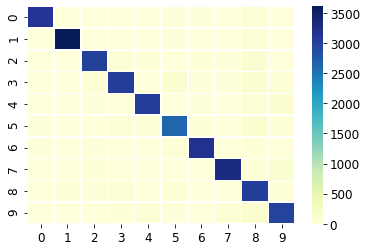

In [20]:
sns.set_palette("PuBuGn_d")
g = sns.heatmap(conf_mx, linewidths=.5, cmap="YlGnBu")

In [21]:
row_sum = conf_mx.sum(axis=1, keepdims=True)
print(row_sum)

[[3284]
 [3740]
 [3307]
 [3453]
 [3288]
 [3020]
 [3347]
 [3551]
 [3271]
 [3339]]


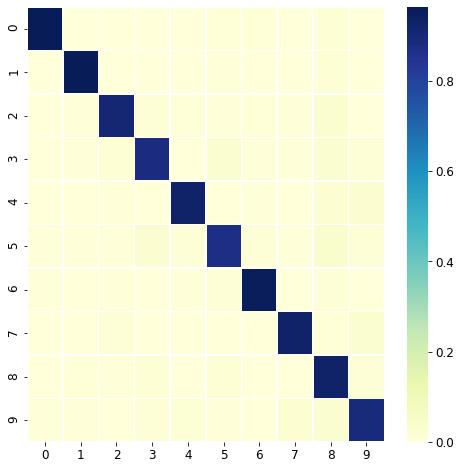

In [22]:
#Normalize confusion matrix to view a better heat map.
plt.figure(figsize=(8,8))
row_sum = conf_mx.sum(axis=1, keepdims=True) # keepdims will result in two dimentional matrix as conf_mx is 2 - dim
conf_mx_norm = conf_mx/row_sum
#sns.heatmap(conf_mx_norm)
g = sns.heatmap(conf_mx_norm, linewidths=.5, cmap="YlGnBu")

In [23]:
f1_score(digit_y_train, y_train_pred, average='weighted')

0.9244841465991

In [24]:
digit_X_test = stdScaler.transform(digit_X_test)

In [25]:
y_test_pred = sgd_clf.predict(digit_X_test)

In [26]:
f1_score(digit_y_test, y_test_pred, average='weighted')

0.9040228148821067

## One-Vs-All

In [27]:
from sklearn.multiclass import OneVsRestClassifier
onevsall = OneVsRestClassifier(SGDClassifier(random_state=32, loss='log'))
onevsall.fit(digit_X_train, digit_y_train)

OneVsRestClassifier(estimator=SGDClassifier(alpha=0.0001, average=False,
                                            class_weight=None,
                                            early_stopping=False, epsilon=0.1,
                                            eta0=0.0, fit_intercept=True,
                                            l1_ratio=0.15,
                                            learning_rate='optimal', loss='log',
                                            max_iter=1000, n_iter_no_change=5,
                                            n_jobs=None, penalty='l2',
                                            power_t=0.5, random_state=32,
                                            shuffle=True, tol=0.001,
                                            validation_fraction=0.1, verbose=0,
                                            warm_start=False),
                    n_jobs=None)

In [28]:
len(onevsall.estimators_)

10

In [29]:
onevsall.predict_proba(np_some_digit)

array([[0.00000000e+000, 5.92217510e-174, 2.73396323e-254,
        1.00000000e+000, 0.00000000e+000, 3.40972431e-103,
        0.00000000e+000, 1.34084090e-301, 2.22063352e-028,
        1.05003766e-170]])

In [30]:
onevsall.decision_function(np_some_digit)

array([[-1538.76390913,  -398.87110238,  -583.85086133,   191.2418777 ,
        -1036.13134216,  -235.93963314, -1389.74516554,  -692.78481603,
          -63.67459008,  -391.39063978]])

In [31]:
onevsall.predict(np_some_digit)

array([3], dtype=int64)

## One-Vs-One

In [32]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(digit_X_train, digit_y_train)
ovo_clf.predict(np_some_digit)

array([3], dtype=int64)

In [33]:
len(ovo_clf.estimators_)

45

In [34]:
ovo_clf.decision_function(np_some_digit)

array([[-0.33300725,  4.67145318,  5.3324977 ,  9.33296221,  1.66740593,
         5.33287496,  0.66691904,  4.74351303,  8.3328273 ,  5.33153079]])

In [35]:
ovo_clf.predict(np_some_digit)

array([3], dtype=int64)

## Softmax Regression Classifier

In [39]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, max_iter=1000, random_state=42)
softmax_reg.fit(digit_X_train, digit_y_train)
y_train_pred_sm = softmax_reg.predict(digit_X_train)

In [40]:
f1_score(digit_y_train, y_train_pred_sm, average='weighted')

0.9609275445895732

In [41]:
confusion_matrix(digit_y_train, y_train_pred_sm)

array([[3257,    0,    3,    3,    3,    3,    4,    0,    8,    3],
       [   0, 3710,    2,    7,    0,    4,    2,    1,    9,    5],
       [   3,    5, 3152,   36,   19,   10,   11,   19,   45,    7],
       [   5,    3,   47, 3231,    1,   77,    3,   14,   48,   24],
       [   3,    9,   14,    2, 3173,    1,   10,    3,    8,   65],
       [   9,    1,   22,   63,   16, 2813,   21,    4,   59,   12],
       [   4,    0,    6,    3,    7,   16, 3303,    0,    7,    1],
       [   1,    5,   17,   10,    9,    1,    2, 3430,    6,   70],
       [   8,   22,   20,   61,    4,   57,   10,    6, 3060,   23],
       [   3,    6,    2,   27,   49,   14,    0,   62,   17, 3159]],
      dtype=int64)